In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from numpy import where
from numpy import meshgrid
from numpy import arange
from numpy import hstack
from numpy import std
from numpy import mean

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

import warnings
warnings.simplefilter('ignore')

In [54]:
# Evaluation using cross validation
def eval_cv(classifier, metric,  X, y):
    kf = KFold(n_splits=5)
    # evaluate model
    scores = cross_val_score(classifier, X, y, scoring=metric, cv=kf)
    # report performance
    return mean(scores)

In [55]:
# Calculate the metrics
def calculate_metrics(df, method, y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    df.loc[method] = [accuracy, precision, recall, f1, auc]

In [56]:
def calculate_cv(df, classifier, method, X, y):
    accuracy = eval_cv(classifier, 'accuracy', X, y)
    precision = eval_cv(classifier, 'precision', X, y)
    recall = eval_cv(classifier, 'recall', X, y)
    f1 = eval_cv(classifier, 'f1', X, y)
    auc = eval_cv(classifier, 'roc_auc', X, y)
    df.loc[method] = [accuracy, precision, recall, f1, auc] 

# Data Import

In [57]:
train_df = pd.read_csv("train.csv", index_col=False)
train_df.drop(columns=['Unnamed: 0', "id"],axis = 1,inplace = True)
pd.set_option('display.max_columns', None)
train_df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [58]:
categorical_indexes = [0, 1, 3, 4] + list(range(6, 20))
train_df.iloc[:,categorical_indexes] = train_df.iloc[:,categorical_indexes].astype('category')
train_df.describe(include = ['category'])

,Gender,Customer Type,Type of Travel,Class,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
count,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904
unique,2,2,2,3,6,6,6,6,6,6,6,6,6,6,5,6,6,6
top,Female,Loyal Customer,Business travel,Business,3,4,3,3,4,4,4,4,4,4,4,4,4,4
freq,52727,84923,71655,49665,25868,25546,24449,28577,24359,30762,31765,29423,30867,28789,37383,29055,37945,27179


In [59]:
def df_desc(df):
    import pandas as pd
    desc = pd.DataFrame({'dtype': df.dtypes,
                         'NAs': df.isna().sum(),
                         'Numerical': (df.dtypes != 'object') & (df.apply(lambda column: column == 0).sum() + df.apply(lambda column: column == 1).sum() != len(df)),
                         'Boolean': df.apply(lambda column: column == 0).sum() + df.apply(lambda column: column == 1).sum() == len(df),
                         'Categorical': df.dtypes == 'object',
                        })
    return desc

df_desc(train_df)

,dtype,NAs,Numerical,Boolean,Categorical
Gender,category,0,True,False,False
Customer Type,category,0,True,False,False
Age,int64,0,True,False,False
Type of Travel,category,0,True,False,False
Class,category,0,True,False,False
Flight Distance,int64,0,True,False,False
Inflight wifi service,category,0,True,False,False
Departure/Arrival time convenient,category,0,True,False,False
Ease of Online booking,category,0,True,False,False
Gate location,category,0,True,False,False


In [60]:
# Count Satisfied / Neutral
train_df["satisfaction"].value_counts()

neutral or dissatisfied    58879
satisfied                  45025
Name: satisfaction, dtype: int64

# Exploratory Data Analysis

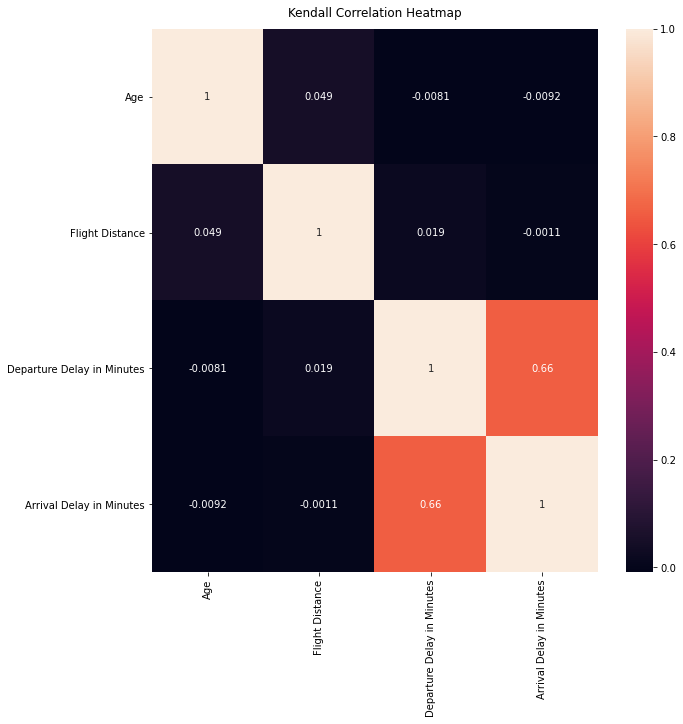

In [61]:
plt.figure(figsize=(10, 10))
heatmap = sns.heatmap(train_df.corr(method='kendall'), annot=True)
heatmap.set_title('Kendall Correlation Heatmap', fontdict={'fontsize':12}, pad=12);
plt.show()

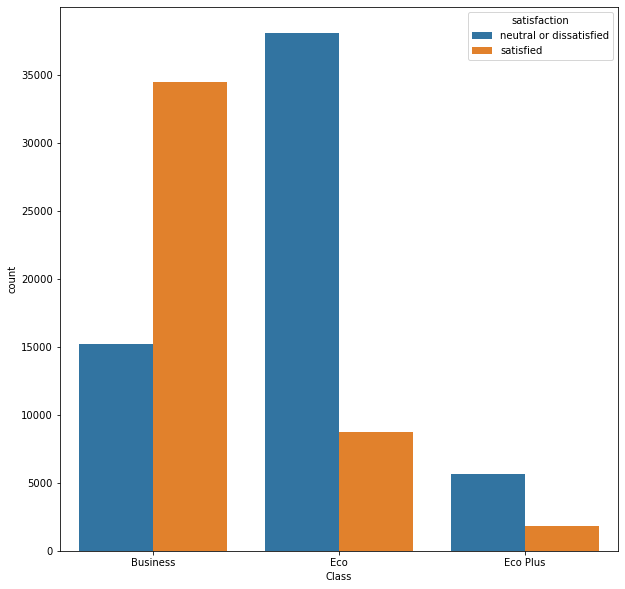

In [62]:
plt.figure(figsize=(10, 10))
sns.countplot(x = 'Class', hue = 'satisfaction', data = train_df)
plt.show()

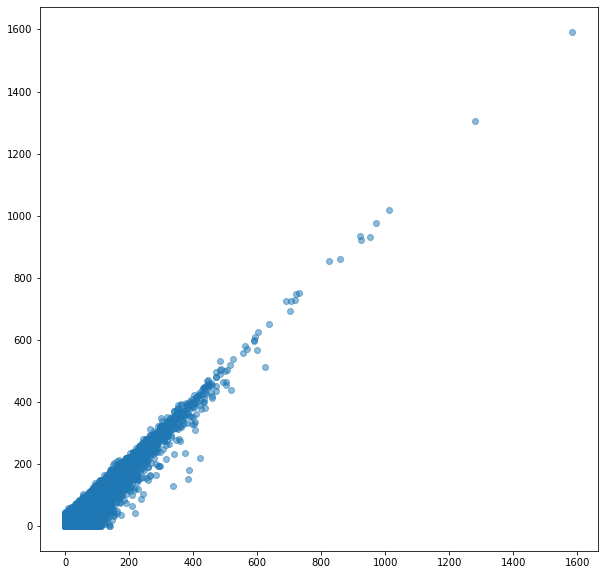

In [63]:
plt.figure(figsize=(10, 10))
plt.scatter(train_df['Arrival Delay in Minutes'], train_df['Departure Delay in Minutes'], alpha = 0.5)
plt.show()

# Missing Values

In [64]:
train_df.isna().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [65]:
train_df['Arrival Delay in Minutes'].fillna(train_df['Arrival Delay in Minutes'].median(axis = 0), inplace = True)
train_df.isna().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

# Preprocessing

In [66]:
# separating into numerical data and categorical
numerical_columns = [c for c in train_df.columns if train_df[c].dtype.name != 'category']
numerical_columns.remove('satisfaction')
categorical_columns = [c for c in train_df.columns if train_df[c].dtype.name == 'category']
data_describe = train_df.describe(include = ['category'])
data_describe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, count to freq
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Gender                             4 non-null      object
 1   Customer Type                      4 non-null      object
 2   Type of Travel                     4 non-null      object
 3   Class                              4 non-null      object
 4   Inflight wifi service              4 non-null      int64 
 5   Departure/Arrival time convenient  4 non-null      int64 
 6   Ease of Online booking             4 non-null      int64 
 7   Gate location                      4 non-null      int64 
 8   Food and drink                     4 non-null      int64 
 9   Online boarding                    4 non-null      int64 
 10  Seat comfort                       4 non-null      int64 
 11  Inflight entertainment             4 non-null      int64 
 12  On-board s

In [67]:
# retruns all the columns that are categorical, and that the data contains more than 2 options
a_columns = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
b_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]

In [68]:
train_df[a_columns]

,Gender,Customer Type,Type of Travel
0,Male,Loyal Customer,Personal Travel
1,Male,disloyal Customer,Business travel
2,Female,Loyal Customer,Business travel
3,Female,Loyal Customer,Business travel
4,Male,Loyal Customer,Business travel
...,...,...,...
103899,Female,disloyal Customer,Business travel
103900,Male,Loyal Customer,Business travel
103901,Male,disloyal Customer,Business travel
103902,Female,disloyal Customer,Business travel


In [69]:
train_df[b_columns]

,Class,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
0,Eco Plus,3,4,3,1,5,3,5,5,4,3,4,4,5,5
1,Business,3,2,3,3,1,3,1,1,1,5,3,1,4,1
2,Business,2,2,2,2,5,5,5,5,4,3,4,4,4,5
3,Business,2,5,5,5,2,2,2,2,2,5,3,1,4,2
4,Business,3,3,3,3,4,5,5,3,3,4,4,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Eco,2,1,2,3,2,2,2,2,3,1,4,2,3,2
103900,Business,4,4,4,4,2,4,5,5,5,5,5,5,5,4
103901,Business,1,1,1,3,4,1,5,4,3,2,4,5,5,4
103902,Eco,1,1,1,5,1,1,1,1,4,5,1,5,4,1


In [70]:
train_df = train_df.replace({"Gender": {"Male": 0, "Female": 1}})
train_df = train_df.replace({"Customer Type": {"Loyal Customer": 0, "disloyal Customer": 1}})
train_df = train_df.replace({"Type of Travel": {"Personal Travel": 0, "Business travel": 1}})
train_df[a_columns]

,Gender,Customer Type,Type of Travel
0,0,0,0
1,0,1,1
2,1,0,1
3,1,0,1
4,0,0,1
...,...,...,...
103899,1,1,1
103900,0,0,1
103901,0,1,1
103902,1,1,1


In [71]:
data_cat = pd.get_dummies(train_df[b_columns])

In [72]:
#Standard Scaler
train_numerical = train_df[numerical_columns]
data_numerical = (train_numerical - train_numerical.mean(axis = 0))/train_numerical.std(axis = 0)

In [73]:
# labelEncoding for the Y target
from sklearn.preprocessing import LabelEncoder

target = train_df['satisfaction']

le = LabelEncoder()
target = le.fit_transform(target)

display(pd.DataFrame(target))

,0
0,0
1,0
2,1
3,0
4,1
...,...
103899,0
103900,1
103901,0
103902,0


In [74]:
# Final Table
train_df = pd.concat((data_numerical, data_cat, train_df[a_columns]), axis = 1)
train_df.head()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Class_Business,Class_Eco,Class_Eco Plus,Inflight wifi service_0,Inflight wifi service_1,Inflight wifi service_2,Inflight wifi service_3,Inflight wifi service_4,Inflight wifi service_5,Departure/Arrival time convenient_0,Departure/Arrival time convenient_1,Departure/Arrival time convenient_2,Departure/Arrival time convenient_3,Departure/Arrival time convenient_4,Departure/Arrival time convenient_5,Ease of Online booking_0,Ease of Online booking_1,Ease of Online booking_2,Ease of Online booking_3,Ease of Online booking_4,Ease of Online booking_5,Gate location_0,Gate location_1,Gate location_2,Gate location_3,Gate location_4,Gate location_5,Food and drink_0,Food and drink_1,Food and drink_2,Food and drink_3,Food and drink_4,Food and drink_5,Online boarding_0,Online boarding_1,Online boarding_2,Online boarding_3,Online boarding_4,Online boarding_5,Seat comfort_0,Seat comfort_1,Seat comfort_2,Seat comfort_3,Seat comfort_4,Seat comfort_5,Inflight entertainment_0,Inflight entertainment_1,Inflight entertainment_2,Inflight entertainment_3,Inflight entertainment_4,Inflight entertainment_5,On-board service_0,On-board service_1,On-board service_2,On-board service_3,On-board service_4,On-board service_5,Leg room service_0,Leg room service_1,Leg room service_2,Leg room service_3,Leg room service_4,Leg room service_5,Baggage handling_1,Baggage handling_2,Baggage handling_3,Baggage handling_4,Baggage handling_5,Checkin service_0,Checkin service_1,Checkin service_2,Checkin service_3,Checkin service_4,Checkin service_5,Inflight service_0,Inflight service_1,Inflight service_2,Inflight service_3,Inflight service_4,Inflight service_5,Cleanliness_0,Cleanliness_1,Cleanliness_2,Cleanliness_3,Cleanliness_4,Cleanliness_5,Gender,Customer Type,Type of Travel
0,-1.745271,-0.731535,0.266391,0.074169,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
1,-0.951356,-0.957179,-0.361373,-0.236312,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1
2,-0.885196,-0.047584,-0.387530,-0.391552,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1
3,-0.951356,-0.629243,-0.099805,-0.158692,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1
4,1.430390,-0.978239,-0.387530,-0.391552,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1


# Split Data into Train and Test

In [75]:
X = train_df
y = target

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Dataframes for Evaluation

In [77]:
# included methods/models and metrics
methods = ['Logistic Regression', 'Random Forest', "Naive Bayes", "SVM"]
metrics = ["accuracy", "precision", "recall", "f1", "auc"]

# create model quality dataframe
quality_df = pd.DataFrame(columns = metrics, index = methods)
display(quality_df)

# create model quality cross validation dataframe
quality_cv_df = pd.DataFrame(columns = metrics, index = methods)
display(quality_cv_df)

,accuracy,precision,recall,f1,auc
Logistic Regression,NaN,NaN,NaN,NaN,NaN
Random Forest,NaN,NaN,NaN,NaN,NaN
Naive Bayes,NaN,NaN,NaN,NaN,NaN
SVM,NaN,NaN,NaN,NaN,NaN


,accuracy,precision,recall,f1,auc
Logistic Regression,NaN,NaN,NaN,NaN,NaN
Random Forest,NaN,NaN,NaN,NaN,NaN
Naive Bayes,NaN,NaN,NaN,NaN,NaN
SVM,NaN,NaN,NaN,NaN,NaN


# Method 1: Random Forest

In [78]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators = 100, oob_score=True, criterion = 'gini', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(oob_score=True, random_state=0)

In [79]:
#Predict the test set 
y_pred = classifier.predict(X_test)
display(pd.DataFrame(y_pred))

,0
0,1
1,0
2,0
3,0
4,1
...,...
20776,1
20777,1
20778,1
20779,0


<AxesSubplot:>

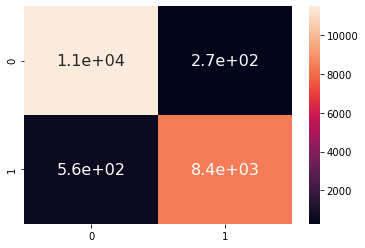

In [80]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, annot_kws={"size": 16})

In [81]:
method = "Random Forest"
calculate_metrics(quality_df, method, y_test, y_pred)
display(quality_df)

,accuracy,precision,recall,f1,auc
Logistic Regression,NaN,NaN,NaN,NaN,NaN
Random Forest,0.959819,0.9687,0.937632,0.952913,0.957219
Naive Bayes,NaN,NaN,NaN,NaN,NaN
SVM,NaN,NaN,NaN,NaN,NaN


# Method 2: Logistic Regression

In [82]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [83]:
#Predicting test set result
y_pred = classifier.predict(X_test)
display(pd.DataFrame(y_pred))

,0
0,1
1,0
2,0
3,0
4,1
...,...
20776,1
20777,1
20778,1
20779,0


<AxesSubplot:>

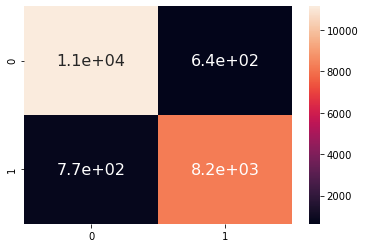

In [84]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, annot_kws={"size": 16})

In [85]:
method = "Logistic Regression"
calculate_metrics(quality_df, method, y_test, y_pred)
display(quality_df)

,accuracy,precision,recall,f1,auc
Logistic Regression,0.93239,0.928169,0.914882,0.921478,0.930338
Random Forest,0.959819,0.9687,0.937632,0.952913,0.957219
Naive Bayes,NaN,NaN,NaN,NaN,NaN
SVM,NaN,NaN,NaN,NaN,NaN


# Method 3: Naive Bayes

In [86]:
# Fit the model
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [87]:
#Predicting test set result
y_pred = classifier.predict(X_test)
display(pd.DataFrame(y_pred))

,0
0,1
1,0
2,0
3,0
4,1
...,...
20776,1
20777,1
20778,1
20779,0


<AxesSubplot:>

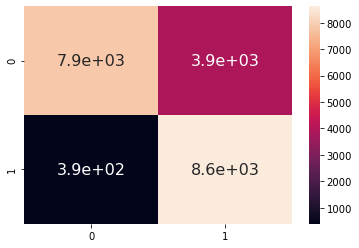

In [88]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, annot_kws={"size": 16})

In [89]:
method = 'Naive Bayes'
calculate_metrics(quality_df, method, y_pred, y_test)
display(quality_df)

,accuracy,precision,recall,f1,auc
Logistic Regression,0.93239,0.928169,0.914882,0.921478,0.930338
Random Forest,0.959819,0.9687,0.937632,0.952913,0.957219
Naive Bayes,0.793369,0.95672,0.688303,0.800613,0.820533
SVM,NaN,NaN,NaN,NaN,NaN


# Method 4: SVM

In [90]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf')
classifier.fit(X_train, y_train)

SVC()

In [91]:
#Predict the test set 
y_pred = classifier.predict(X_test)
display(pd.DataFrame(y_pred))

,0
0,1
1,0
2,0
3,0
4,1
...,...
20776,1
20777,1
20778,1
20779,0


<AxesSubplot:>

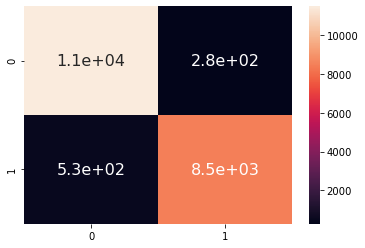

In [92]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, annot_kws={"size": 16})

In [93]:
method = 'SVM'
calculate_metrics(quality_df, method, y_pred, y_test)
display(quality_df)

,accuracy,precision,recall,f1,auc
Logistic Regression,0.93239,0.928169,0.914882,0.921478,0.930338
Random Forest,0.959819,0.9687,0.937632,0.952913,0.957219
Naive Bayes,0.793369,0.95672,0.688303,0.800613,0.820533
SVM,0.96083,0.940739,0.968026,0.954187,0.961807
